# Pandas Warmup

Pandas out yer ears

## Data setup

Import: 

- Pandas under the alias 'pd'

- Matplotlib.pyplot under the alias 'plt'

Run:
- %matplotlib inline

In [7]:
#__SOLUTION__

#data manip
import pandas as pd

#data viz
import matplotlib.pyplot as plt

#jn commands
#run charts below cells
%matplotlib inline 

#### Make a dataframe by reading in the csv 'Chicago_Park_District__Movies_in_the_Parks_2019' which is in the "data" folder  

#### Assign the dataframe to the variable 'movies'

#### Look at the first five rows

In [303]:
#__SOLUTION__

movies = pd.read_csv('data/Chicago_Park_District__Movies_in_the_Parks_2019.csv')

movies.head()

,Day,Date,Park,Park Phone,Title,CC,Rating,Underwriter,Park Address,Location
0,Mon,08/12/2019,River Park,(312) 742-7516,Hotel Transylvania 3,Y,PG,NaN,5100 N. Francisco Ave.,"(41.97406838, -87.70144885)"
1,Thu,07/18/2019,Hoard Playground Park,(773) 256-1903,Black Panther,Y,PG-13,NaN,7201 S. Dobson Ave.,"(41.7640317, -87.59928813)"
2,Fri,06/07/2019,Berger Park Cultural Center,(773) 761-0376,Some Like It Hot,Y,NR,NaN,6205 N. Sheridan Rd.,"(41.99480562, -87.65538421)"
3,Sat,07/13/2019,Skinner Park,(312) 746-5560,Big Hero 6,Y,PG,The Museum of Science and Industry,1331 W. Monroe St.,"(41.88015941, -87.66077867)"
4,Wed,07/24/2019,Kilbourn Park,(773) 685-3351,El Reality,Y,NR,The International Latino Cultural Center,3501 N. Kilbourn Ave.,"(41.94450485, -87.73951111)"


#### What kind of type is the data in the Date column?  Turn it into a datetime type if it's not already

In [278]:
#__SOLUTION__

print(movies.dtypes)

movies.Date = pd.to_datetime(movies.Date)

Day                      int64
Date            datetime64[ns]
Park                    object
Park Phone              object
Title                   object
CC                      object
Rating                  object
Underwriter             object
Park Address            object
Location                object
area_code               object
dtype: object


#### Replace the Day column with an integer for the day of the week derived from the datetime object in the Date column 

[*Hint*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html)

In [318]:
#__SOLUTION__
movies.Day = pd.Categorical(
    movies.Day, 
    categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    ordered=True
    )

105    Mon
84     Mon
28     Mon
185    Mon
23     Mon
      ... 
138    Sun
44     Sun
33     Sun
179    Sun
184    Sun
Name: Day, Length: 210, dtype: category
Categories (7, object): [Mon < Tue < Wed < Thu < Fri < Sat < Sun]

## Data Exploration

#### What is the most frequent place to show a movie?  (Remember that there might be a tie!)

In [38]:
#__SOLUTION__
venue_counts = (
    movies
    .Park
    .value_counts()
)

max_spot = venue_counts.max()

venue_counts[venue_counts==max_spot].index.tolist()

['Ward (A. Montgomery) Park']

#### Are there more 773 or 312 area codes for places where movies are shown?  

In [22]:
#__SOLUTION__
movies['area_code'] = [num[1:4] for num in movies['Park Phone']]

movies.area_code.value_counts()

312    151
773     58
317      1
Name: area_code, dtype: int64

#### Group the data by what day of the week the movies are shown using `.groupby()`

#### Assign to the variable "movies_grp_day" (what type of object is this?)

In [305]:
#__SOLUTION__

movies_grp_day = movies.groupby('Day')

type(movies_grp_day)

pandas.core.groupby.generic.DataFrameGroupBy

#### Select just the movies shown on Monday (what type of object is *this*?)

In [ ]:
#__SOLUTION__

movies_mon = movies_grp_day.get_group('Mon')

type(movies_mon)

#### Using `movies_grp_day`, get the modal rating shown each day

*Hint: look at [the groupby documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and write a function*

In [37]:
#__SOLUTION__

def groupby_mode(gm_group):
    '''
    Returns the modal value for a group in a groupby object
    
    Parameters:
        gm_group: group of a groupby object
    
    Returns:
        list of modal values in gm_group
    '''
    values = gm_group.value_counts()
        
    mode_list = list(
        values[
            values==values.max()
        ]
        .index
    )
    
    #what does this do? why only apply it when len==1?
    if len(mode_list)==1:
        mode_list = mode_list[0]
     
    return mode_list
    
movies_grp_day['Rating'].agg(
    lambda x: 
    groupby_mode(x)
)

Day
Fri       PG
Mon       PG
Sat       PG
Sun       PG
Thu    PG-13
Tue       PG
Wed       PG
Name: Rating, dtype: object

## Strrretch Goal

#### Make a stacked bar chart showing the ratings of movies across days of the week using fig and ax objects

#### Title the x-axis "Days of the Week"

#### Title the y-axis "Number of Movies Shown"

#### Title the chart as a whole "Chicago Movies in the Park by Days and Rating"

[*Hint*](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html)

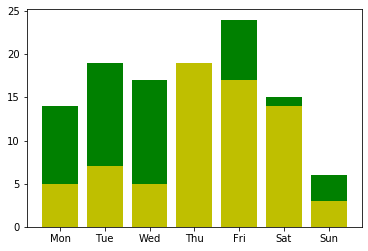

In [359]:
#__SOLUTION__


movie_day_ratings = (
movies
    .groupby(['Day', 'Rating'])['Day', 'Rating']
    .count()
    .unstack()
    .drop(['Rating'], axis=1)
    .unstack()
    .reset_index()
    .drop('level_0', axis=1)
    .rename(columns={0:'Count'})
)


fig, ax = plt.subplots()
for x in movie_day_ratings.index:
    ax.bar(
        movie_day_ratings['Day'][x], 
        movie_day_ratings['Count'][x],
        color=color_map[movie_day_ratings['Rating'][x]]
          )

movies_grp_day.get_group('Fri')['Rating'].value_counts()

def rating_counts(day):
    counts = movies_grp_day.get_group(day)['Rating'].value_counts()

    counts.sort_values(ascending=True, inplace=True)

    zipped = [list(x) for x in zip(counts.index, counts.values)]

    zipped = [rating+[day] for rating in zipped]
    print(zipped)
    return zipped
    
def bar_chart(x, y, leg):
    return ax.bar(x,y, legend=leg)

# [
#     ax.bar(rating[2], rating[1], label=rating[0]) 
#     for 
#     rating 
#     in 
#         [rating_counts(day) 
#          for 
#          day 
#          in 
#          movies.Day.unique()
#     ]
# ]

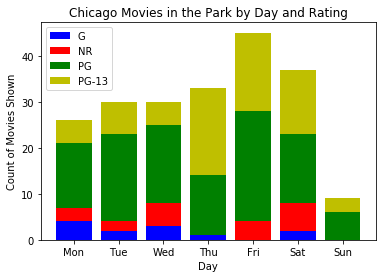

In [369]:
#__SOLUTION__

#Turn Day column into an ordered categorical and sort
movies.Day = pd.Categorical(
    movies.Day, 
    categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    ordered=True
    )

movies.sort_values('Day', ascending=True, inplace=True)

#create figures
fig, ax = plt.subplots()
color_map = dict(zip(['NR', 'G', 'PG', 'PG-13'], ['r','b','g','y']))

#this will store info for the legend
reps = []

#for each day:
for index, day in enumerate(movies.Day.unique()):
    
    #get series with index rating and values play count
    counts = movies_grp_day.get_group(day)['Rating'].value_counts()
    
    #sort so ratings are in the same order each day
    counts = counts.sort_index(ascending=True)
    
    #get all the information we need for each graph in one object
    #store as (rating, play count, day)
    zipped = [rating+[day] 
              for rating 
              in 
                  [list(x) 
                   for x 
                   in zip(
                       counts.index, 
                       counts.values
                   )
                  ]
             ]
    
    #track where to start each stacked bar 
    lower=0
    
    #for each rating per day
    for rating in zipped:
        
        #extract (rating, play count, day) and use to graph
        rep, = ax.bar(rating[2], 
               rating[1], 
               color=color_map[rating[0]],
               bottom=lower       
        ) 
        
        #set bottom of next bar at top of graphed one
        lower=rating[1]+lower
        
        #append graph info for legend
        reps.append(rep)
        
#graph metadata
ax.legend(handles=reps, labels=['G', 'NR', 'PG', 'PG-13'])
ax.set_xlabel('Day')
ax.set_ylabel('Count of Movies Shown')
ax.set_title('Chicago Movies in the Park by Day and Rating')
plt.show()